[Website reference](https://mubaris.com/posts/kmeans-clustering/)

In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
DATA_FILE_PATH = '../data/xclara.csv'

In [3]:
data = pd.read_csv(DATA_FILE_PATH)
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


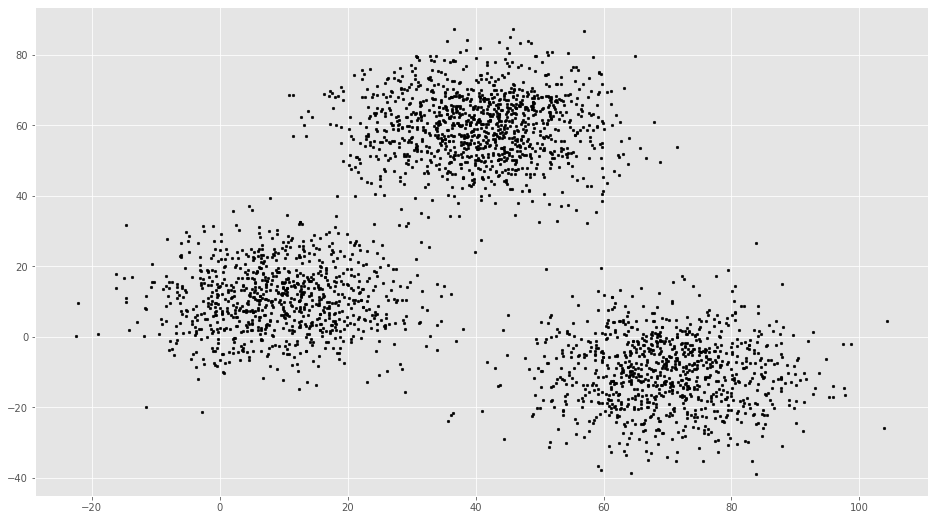

In [20]:
# Getting the values and plotting them
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, color = 'black', s = 7)

In [21]:
# Calculating Euclidean distance
def dist(a, b, ax = 1):
    return np.linalg.norm(a - b, axis = ax)

In [27]:
# Initialize the number of clusters
k = 3

# X coordinates of random centroids
C_x = np.random.randint(X.max() - 20, size = k)
C_y = np.random.randint(X.max() - 20, size = k)

C = np.array(list(zip(C_x, C_y)), dtype = np.float32)
print(C)

[[ 5. 12.]
 [75. 33.]
 [64. 62.]]


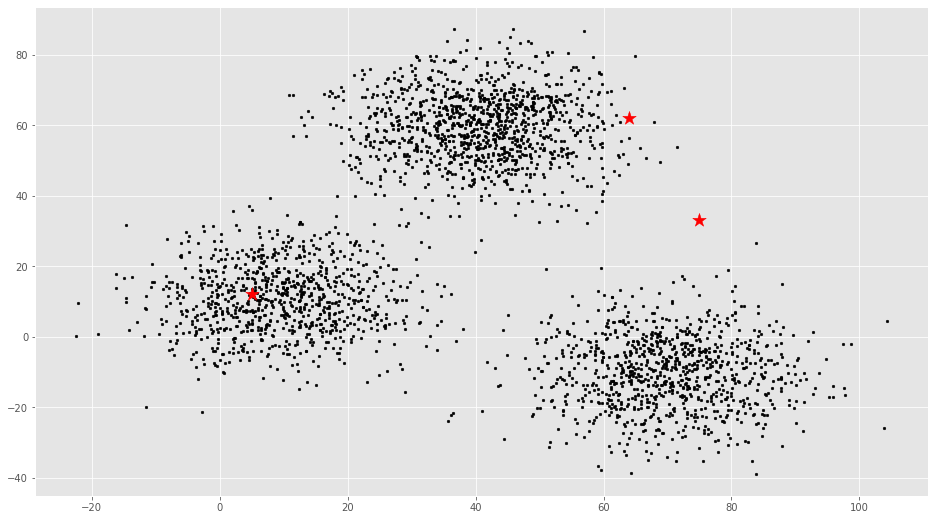

In [28]:
# Plot data along with the Centroids
plt.scatter(f1, f2, color = 'black', s = 7)
plt.scatter(C_x, C_y, color = 'red', s = 200, marker = '*')

In [29]:
# To store the value of centroids as it updates
C_old = np.zeros(C.shape)

# Cluster labels
clusters = np.zeros(len(X))

# Error function - Distance between new centroids and old centroids
error = dist(C, C_old, None)

In [30]:
error

121.74974332621815

In [37]:
# Loop until error becomes zero
while error != 0:
    # Assign each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        
    # Storing the old centroid values
    C_old = deepcopy(C)
    
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis = 0)
    
    error = dist(C, C_old, None)

In [36]:
# for i in range(1500,1520):
#     d = dist(X[i], C)
#     c_tmp = np.argmin(d)
#     print(f'd = {d}\tc_tmp = {c_tmp}\n')

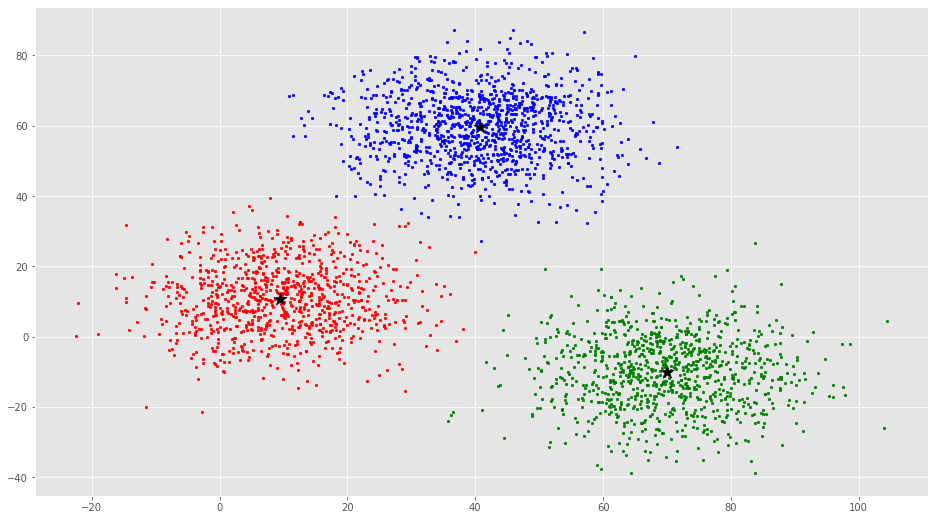

In [38]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')